In [1]:
from data_preparation import DataPreparator
from apply_clustering import ClusteringApplier

In [2]:
import os.path
from itertools import chain, combinations
from typing import Dict, List, Tuple, Iterable, Any

import numpy as np
import pandas as pd
from gapstatistics.gapstatistics import GapStatistics
from clustering import AgglomerativeClusteringWrapper as AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.spatial.distance import jensenshannon, correlation, euclidean
from tqdm.contrib.concurrent import thread_map
import seaborn as sns

import config

In [3]:
import torch
from torch.distributions import kl_divergence
from torch.distributions.uniform import Uniform
from torch.distributions.beta import Beta
from torch.distributions.dirichlet import Dirichlet
from ParameterizedModel.parameterized_model import Paremeterized_Model
from ParameterizedModel.utils.distribution_helpers import mean_std_to_beta_params

from ParameterizedModel.training import Trainer

In [4]:
from gradient_solver import construct_distance_matrix

In [5]:
import timeit

In [6]:
from IPython.display import display, Math, Latex

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [8]:
from scipy.spatial.distance import correlation

In [9]:
from gradient_solver import *

In [52]:
EXPLAINING_FEATURE_NAMES = list(config.EXPLAINING_FEATURE_NAMES.keys())
observed_features = list(config.OBSERVABLE_FEATURE_NAMES.keys())

df_observable = DataPreparator.read_excel_sheet(
        config.INPUT_FILE_OBSERVABLE_FEATURES, observed_features
    )

df_explainable = DataPreparator.read_excel_sheet(
    config.INPUT_FILE_EXPLAINING_FEATURES, EXPLAINING_FEATURE_NAMES
)

In [54]:
preparation_result = DataPreparator.prepare_data(
    use_config=False,
    df_observable=df_observable,
    df_explainable=df_explainable,
    distortion_mean=config.DISTORTION_MEAN,
    distortion_std=config.DISTORTION_STD,
    observed_features=observed_features,
    explaining_features=EXPLAINING_FEATURE_NAMES,
    nn_imputation_k=config.NN_IMPUTATION_K,
    group_name=config.GROUP_NAME
)

In [55]:
'''optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot(
    use_config=False,
    df_observable=preparation_result['observable_df'],
    observed_features=observed_features,
    gap_statistic_cluster_range=config.GAP_STATISTIC_CLUSTER_RANGE,
    plot=False
)'''

"optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot(\n    use_config=False,\n    df_observable=preparation_result['observable_df'],\n    observed_features=observed_features,\n    gap_statistic_cluster_range=config.GAP_STATISTIC_CLUSTER_RANGE,\n    plot=False\n)"

In [59]:
optimal_number_of_clusters = {
    'n_clusters': 9
}

In [60]:
observable_patterns_result = ClusteringApplier.calculate_observable_patterns(
    use_config=False,
    df_observable_data=preparation_result['observable_df'],
    _n_clusters=optimal_number_of_clusters['n_clusters'],
    observable_name=config.OBSERVABLE_NAME,
    observable_feature_names=observed_features,
    plot_title=config.OBSERVABLE_PATTERN_NAME_PLURAL,
    number_observable_patterns='auto',
    distance_measure_fingerprint=config.DISTANCE_MEASURE_FINGERPRINT,
    group_name=config.GROUP_NAME, 
    plot=False
)
calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
    use_config=False,
    df_explainable=preparation_result['explainable_df'].copy(),
    df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
    explaining_features=EXPLAINING_FEATURE_NAMES,
    method=config.INFERENCE_MODE_EXPLAINING_FEATURES,
    distance_measure=config.DISTANCE_MEASURE_EXPLAINABLE_FEATURES,
    sparsity_parameter=config.SPARSITY,
    max_num_threads=config.MAX_NUM_THREADS,
    group_name=config.GROUP_NAME,
    heuristics_N=config.HEURISTIC_N,
    plot=False
)

  0%|          | 0/65535 [00:00<?, ?it/s]

In [65]:
calculate_explainable_distances_result['df_explainable_distances']

Country,Australia,Brazil,Canada,China,Colombia,Costa Rica,Dominican Republic,Ecuador,France,Germany,...,Singapore,Slovakia,South Africa,South Korea,Spain,Sweden,Thailand,United Arab Emirates,United Kingdom,United States of America
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
def ward_distance(x, y):
    # Compute the centroids of the two clusters
    centroid_x = torch.mean(x, dim=0)
    centroid_y = torch.mean(y, dim=0)

    # Compute the variance within each cluster
    var_x = torch.sum((x - centroid_x) ** 2) / (x.shape[0] - 1)
    var_y = torch.sum((y - centroid_y) ** 2) / (y.shape[0] - 1)

    # Compute the variance between the two clusters
    var_between = torch.sum((centroid_x - centroid_y) ** 2)

    # Compute the Ward distance
    return var_between + var_x + var_y

In [67]:
keystr = 'df_observable_data'

x = torch.tensor(observable_patterns_result[keystr].loc[:, observed_features].to_numpy())
y = torch.tensor(observable_patterns_result['df_cluster_median'].to_numpy())

alternative = ((x.unsqueeze(1) - y.unsqueeze(0)).pow(2).clamp(min=1e-20)).sum(2).sqrt()

vergleich = observable_patterns_result['df_observable_data'].pattern_type == alternative.argmin(dim=1).numpy() #torch.cdist(x, y).argmin(dim=1).numpy()
print(vergleich)
print(vergleich.sum() / observable_patterns_result[keystr].shape[0])

print(alternative.argmin(dim=1).numpy()[:23])
print(observable_patterns_result['df_observable_data'].pattern_type[:23].to_numpy())

0        True
1       False
2       False
3        True
4        True
        ...  
4289    False
4290    False
4291     True
4292    False
4293    False
Name: pattern_type, Length: 4294, dtype: bool
0.6590591523055426
[7 8 2 4 6 6 2 7 7 7 4 7 7 6 6 5 7 2 4 0 7 6 8]
[7 0 0 4 6 7 1 6 0 5 4 5 6 6 6 5 7 2 6 0 7 6 6]


In [68]:
my_df = observable_patterns_result[keystr].copy()
my_df = my_df[my_df["oversampled"] == False]

In [69]:
df_observable_distances = observable_patterns_result['pw_norm_dist']
df_observable_distances.head()

Country,Australia,Benin,Brazil,Canada,China,Colombia,Congo,Costa Rica,DRC,Dominican Republic,...,South Africa,South Korea,Spain,Sweden,Taiwan,Thailand,Uganda,United Arab Emirates,United Kingdom,United States of America
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000,0.000576,0.000329,0.000220,0.000381,0.000662,0.000682,0.000537,0.000612,0.000591,...,0.000217,0.000574,0.000527,0.000221,0.001449,0.000797,0.000665,0.000766,0.000409,0.000294
Benin,0.000576,0.000000,0.000676,0.000443,0.000310,0.000547,0.000668,0.000662,0.000667,0.000503,...,0.000514,0.000398,0.000497,0.000529,0.001322,0.000568,0.000612,0.000525,0.000385,0.000376
Brazil,0.000329,0.000676,0.000000,0.000362,0.000524,0.000522,0.000651,0.000320,0.000638,0.000451,...,0.000333,0.000601,0.000432,0.000441,0.001471,0.000756,0.000776,0.000665,0.000628,0.000417
Canada,0.000220,0.000443,0.000362,0.000000,0.000277,0.000527,0.000615,0.000487,0.000630,0.000466,...,0.000234,0.000441,0.000392,0.000248,0.001434,0.000722,0.000620,0.000638,0.000309,0.000245
China,0.000381,0.000310,0.000524,0.000277,0.000000,0.000524,0.000762,0.000585,0.000653,0.000451,...,0.000359,0.000351,0.000379,0.000364,0.001345,0.000568,0.000582,0.000564,0.000277,0.000200


In [70]:
df_observable_distances.index

Index(['Australia', 'Benin', 'Brazil', 'Canada', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'DRC', 'Dominican Republic', 'Ecuador', 'France',
       'Germany', 'India', 'Ireland', 'Japan', 'Kenya', 'Mexico', 'Morocco',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Taiwan', 'Thailand', 'Uganda', 'United Arab Emirates',
       'United Kingdom', 'United States of America'],
      dtype='object', name='Country')

In [71]:
@torch.jit.script
def torch_relative_entropy(x:torch.Tensor, y:torch.Tensor) -> torch.Tensor:
    return (x * torch.log(x/y))

@torch.jit.script
def apply_weights(A, w):
    return w.unsqueeze(-1)*A*w

@torch.jit.script
def weighted_mean(A, w):
    _w = w / w.sum()
    return ((_w*A).sum(dim=1)*_w).sum()

@torch.jit.script
def weighted_pearson_corrcoef(x:torch.Tensor, y:torch.Tensor, w:torch.Tensor) -> torch.Tensor:
    '''
    Calculates the Person correlation coefficient.
    PyTorch equivalent to numpy.corrcoef(x, y)[0, 1].
    '''

    A = apply_weights(x, w)
    Am = weighted_mean(A, w)
    vx = apply_weights(A - Am, w)

    B = apply_weights(y, w)
    Bm = weighted_mean(B, w)
    vy = apply_weights(B - Bm, w)

    return torch.sum(vx * vy) / (torch.sqrt(torch.sum(vx ** 2)) * torch.sqrt(torch.sum(vy ** 2)) + 1e-20)

In [72]:
class FeatureSelectionModel(Paremeterized_Model):
    def __init__(self, df_explainable:pd.DataFrame, df_observable_distances:pd.DataFrame, num_samples:int=1, penalty=0., device='cpu', dtype=torch.float32):
        super().__init__(device, dtype)

        self.df_explainable = df_explainable.copy()
        self.df_explainable.sort_index(inplace=True)

        self.tensor_explainable = torch.tensor(self.df_explainable.to_numpy(), dtype=self.dtype, device=self.device)
        self.tensor_observable_distances = torch.tensor(df_observable_distances.to_numpy(), dtype=self.dtype, device=self.device)

        self.feature_names = list(df_explainable.columns)

        self.N = self.tensor_explainable.shape[0]
        self.M = len(self.feature_names)
        self._range = torch.arange(self.N, device=self.device)

        self.penalty = torch.tensor(penalty, device=self.device, dtype=self.dtype)

        self.num_samples = num_samples
        
        alpha, beta = mean_std_to_beta_params(0.5, 0.05)

        noise_1 = torch.rand(len(self.feature_names))
        noise_2 = torch.rand(len(self.feature_names))

        alpha_init = alpha * torch.ones(len(self.feature_names)) * 0.9 + noise_1 * 0.1
        beta_init  = beta  * torch.ones(len(self.feature_names)) * 0.9 + noise_2 * 0.1

        self.add_param('alpha', torch.log(alpha_init), lambda x: x.exp())
        self.add_param('beta',  torch.log(beta_init), lambda x: x.exp())

        self.best_loss = None 
        self.best_weights = None
        
    def get_feature_weights(self) -> dict:
        w = self.best_feature_weights
        feature_dict = {feature_name:float(weight) for feature_name, weight in zip(self.feature_names, w)}
        return feature_dict
    
    def get_feature_certainty(self) -> dict:
        s = Beta(self.constrained('alpha'), self.constrained('beta')).stddev.clone().detach().numpy()
        stdev_dict = {feature_name:float(std) for feature_name, std in zip(self.feature_names, s)}
        return stdev_dict
    
    def save_if_best_loss(self, loss, feature_weights):
        if self.best_loss is None:
            self.best_loss = loss.clone().detach()
            self.best_feature_weights = feature_weights.clone().detach()
        elif loss < self.best_loss:
            self.best_loss = loss.clone().detach()
            self.best_feature_weights = feature_weights.clone().detach()

    def sample(self, num_samples:int=1000):
        samples = Beta(self.constrained('alpha'), self.constrained('beta')).sample([num_samples]).numpy()
        res_df = pd.DataFrame({self.feature_names[i]:samples[:, i] for i in range(len(self.feature_names))})
        return res_df
    
    def plot(self, num_samples:int=1000):
        plt.figure(figsize=(10, 5))
        sns.barplot(self.sample(num_samples))

    def loss(self, data:torch.Tensor|None=None) -> torch.tensor:
 
        # Sample feature_weights
        feature_weights = Beta(self.constrained('alpha'), self.constrained('beta')).rsample([self.num_samples]).mean(dim = 0)
      
        # Construct the distance_matrix 
        feature_distances = construct_distance_matrix(
            A=self.tensor_explainable, feature_weights=feature_weights, normalize=False
        )

        # Calculate the correlation between the distance matrix and the observable distances
        coef = pearson_corrcoef(feature_distances, self.tensor_observable_distances)

        # Loss
        loss = torch.log(1. + 1e-10 -coef)

        self.save_if_best_loss(loss, feature_weights)

        return loss

In [73]:
class BayesFeatureSelectionModel(Paremeterized_Model):
    def __init__(self, df_explainable:pd.DataFrame, df_observable_distances:pd.DataFrame, num_samples:int=1, penalty=0., device='cpu', dtype=torch.float32):
        super().__init__(device, dtype)

        self.df_explainable = df_explainable.copy()
        self.df_explainable.sort_index(inplace=True)

        self.tensor_explainable = torch.tensor(self.df_explainable.to_numpy(), dtype=self.dtype, device=self.device)
        self.tensor_observable_distances = torch.tensor(df_observable_distances.to_numpy(), dtype=self.dtype, device=self.device)

        self.feature_names = list(df_explainable.columns)

        self.N = self.tensor_explainable.shape[0]
        self.M = len(self.feature_names)
        self._range = torch.arange(self.N, device=self.device)

        self.penalty = torch.tensor(penalty, device=self.device, dtype=self.dtype)

        self.num_samples = num_samples
        
        alpha, beta = mean_std_to_beta_params(0.5, 0.05)

        noise_1 = torch.rand(len(self.feature_names))
        noise_2 = torch.rand(len(self.feature_names))

        alpha_init = alpha * torch.ones(len(self.feature_names)) * 0.9 + noise_1 * 0.1
        beta_init  = beta  * torch.ones(len(self.feature_names)) * 0.9 + noise_2 * 0.1

        self.add_param('alpha', torch.log(alpha_init), lambda x: x.exp())
        self.add_param('beta',  torch.log(beta_init), lambda x: x.exp())

        self.best_loss = None 
        self.best_weights = None
        
    def get_feature_weights(self) -> dict:
        w = self.best_feature_weights
        feature_dict = {feature_name:float(weight) for feature_name, weight in zip(self.feature_names, w)}
        return feature_dict
    
    def get_feature_certainty(self) -> dict:
        s = Beta(self.constrained('alpha'), self.constrained('beta')).stddev.clone().detach().numpy()
        stdev_dict = {feature_name:float(std) for feature_name, std in zip(self.feature_names, s)}
        return stdev_dict
    
    def save_if_best_loss(self, loss, feature_weights):
        if self.best_loss is None:
            self.best_loss = loss.clone().detach()
            self.best_feature_weights = feature_weights.clone().detach()
        elif loss < self.best_loss:
            self.best_loss = loss.clone().detach()
            self.best_feature_weights = feature_weights.clone().detach()

    def sample(self, num_samples:int=1000):
        samples = Beta(self.constrained('alpha'), self.constrained('beta')).sample([num_samples]).numpy()
        res_df = pd.DataFrame({self.feature_names[i]:samples[:, i] for i in range(len(self.feature_names))})
        return res_df
    
    def plot(self, num_samples:int=1000):
        plt.figure(figsize=(10, 5))
        sns.barplot(self.sample(num_samples))

    def loss(self, data:torch.Tensor|None=None) -> torch.tensor:
 
        # Sample feature_weights
        feature_weights = Beta(self.constrained('alpha'), self.constrained('beta')).rsample([self.num_samples]).mean(dim = 0)
      
        # Construct the distance_matrix 
        feature_distances = construct_distance_matrix(
            A=self.tensor_explainable, feature_weights=feature_weights, normalize=False
        )

        # Calculate the correlation between the distance matrix and the observable distances
        coef = pearson_corrcoef(feature_distances, self.tensor_observable_distances)

        # KL-Divergence term
        alpha_prior = torch.tensor(1.0, device=self.device, dtype=self.dtype)
        beta_prior = torch.tensor(1.0, device=self.device, dtype=self.dtype)
        kl_div = Beta(self.constrained('alpha'), self.constrained('beta')).kl_divergence(
            Beta(alpha_prior, beta_prior)
        ).sum()

        # Loss
        likelihood_loss = torch.log(1. + 1e-10 -coef)
        loss = likelihood_loss + self.penalty * kl_div

        self.save_if_best_loss(loss, feature_weights)

        return loss

In [74]:
def uniform_list(von, bis, num):
    lis = list(Uniform(von, bis).sample([num]))
    return [float(li) for li in lis]

In [75]:
from gradient_solver import _construct_distance_matrix

In [76]:
df_explainable = preparation_result['explainable_df'].copy().set_index(config.GROUP_NAME)
df_observable_distances = observable_patterns_result['pw_norm_dist'].copy()

In [78]:
df_explainable.shape, df_observable_distances.shape

((35, 16), (42, 42))

In [84]:
valid_indices = np.intersect1d(df_explainable.index, df_observable_distances.index)
valid_indices.sort()
valid_indices

array(['Australia', 'Brazil', 'Canada', 'China', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'France', 'Germany', 'India',
       'Ireland', 'Japan', 'Kenya', 'Mexico', 'Morocco', 'Nigeria',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Thailand',
       'United Arab Emirates', 'United Kingdom',
       'United States of America'], dtype=object)

In [85]:
for d in [df_explainable, df_observable_distances]:
    for idx in d.index:
        if idx not in valid_indices:
            print(idx)

Benin
Congo
DRC
Namibia
Niger
Taiwan
Uganda


In [171]:
valid_indices = np.intersect1d(df_explainable.index, df_observable_distances.index)
valid_indices.sort()
df_explainable = df_explainable.loc[valid_indices]
df_observable_distances = df_observable_distances.loc[valid_indices, valid_indices]

In [175]:
model = FeatureSelectionModel(
    df_explainable=df_explainable,
    df_observable_distances=df_observable_distances,
    num_samples=1,
    penalty = 0.1
)

# After this many steps, the learning rate is halved
HALFLIFE = 65

optimizer = torch.optim.RMSprop(
    params = [
        {'params': model.parameters['alpha'], 'lr': 0.001, 'momentum': 0.5},
        {'params': model.parameters['beta'],  'lr': 0.001, 'momentum': 0.5},
    ]
)

lr_halflife = lambda epochs: 0.5**(1/epochs)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: lr_halflife(HALFLIFE)**epoch)
trainer = Trainer(model = model, optimizer = optimizer, scheduler = scheduler, dataloader = range(100))

In [176]:
print(f'Loss before training: {model.loss().clone().detach()}')
trainer.train(epochs = 1000, timeout=60000)

Loss before training: -0.21960534155368805
1/1000 --- Mean Loss : -0.2718569338321686
2/1000 --- Mean Loss : -0.32528865337371826
3/1000 --- Mean Loss : -0.3502150774002075
4/1000 --- Mean Loss : -0.3664303421974182
5/1000 --- Mean Loss : -0.3770005404949188
6/1000 --- Mean Loss : -0.3846464455127716
7/1000 --- Mean Loss : -0.3908687233924866
8/1000 --- Mean Loss : -0.39577266573905945
9/1000 --- Mean Loss : -0.4002208709716797
10/1000 --- Mean Loss : -0.40417036414146423
11/1000 --- Mean Loss : -0.40832215547561646
12/1000 --- Mean Loss : -0.4120049476623535
13/1000 --- Mean Loss : -0.41543883085250854
14/1000 --- Mean Loss : -0.4186789095401764
15/1000 --- Mean Loss : -0.4221467971801758
16/1000 --- Mean Loss : -0.4258262515068054
17/1000 --- Mean Loss : -0.428412526845932
18/1000 --- Mean Loss : -0.4314958453178406
19/1000 --- Mean Loss : -0.4339660704135895
20/1000 --- Mean Loss : -0.43699416518211365
21/1000 --- Mean Loss : -0.43972188234329224
22/1000 --- Mean Loss : -0.443244278

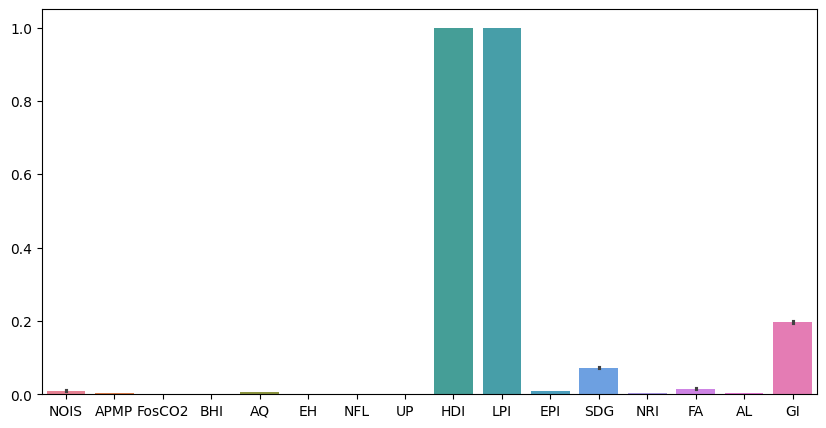

In [177]:
model.plot()

In [ ]:
...